# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/deancuva/EDA/refs/heads/main/assignment/data/ForeignGifts_edu.csv')

print(df.head())

print(df.columns)


   ID   OPEID               Institution Name          City State  \
0   1  102000  Jacksonville State University  Jacksonville    AL   
1   2  104700                Troy University          Troy    AL   
2   3  105100          University of Alabama    Tuscaloosa    AL   
3   4  105100          University of Alabama    Tuscaloosa    AL   
4   5  105100          University of Alabama    Tuscaloosa    AL   

   Foreign Gift Received Date  Foreign Gift Amount      Gift Type  \
0                       43738               250000  Monetary Gift   
1                       43592               463657       Contract   
2                       43466              3649107       Contract   
3                       43472                 1000       Contract   
4                       43479                49476       Contract   

  Country of Giftor                          Giftor Name  
0             CHINA                                  NaN  
1             CHINA     Confucius Institute Headquarters  

2. For Foreign Gift Amount, create a histogram and describe the variable. Describe your findings.

In [ ]:
df['Foreign Gift Amount'] = pd.to_numeric(df['Foreign Gift Amount'], errors='coerce')

df = df.dropna(subset=['Foreign Gift Amount'])


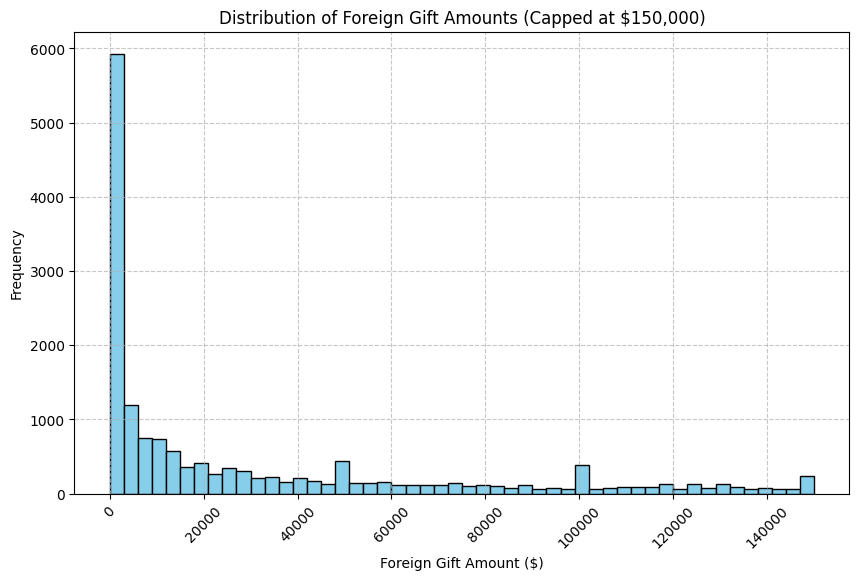

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df[(df['Foreign Gift Amount'] > 0) & (df['Foreign Gift Amount'] <= 150000)]['Foreign Gift Amount'],
         bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Foreign Gift Amounts (Capped at $150,000)')
plt.xlabel('Foreign Gift Amount ($)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



3. For Gift Type, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

In [ ]:
gift_type_counts = df['Gift Type'].value_counts()
total_gifts = gift_type_counts.sum()

selected_types = ['Monetary Gift', 'Contract', 'Real Estate']
selected_counts = gift_type_counts[gift_type_counts.index.isin(selected_types)]
selected_proportions = selected_counts / total_gifts

result = pd.DataFrame({
    'Gift Type': selected_counts.index,
    'Count': selected_counts.values,
    'Proportion': [f'{x:.2f}%' for x in (selected_proportions.values * 100)]
})

result.reset_index(drop=True, inplace=True)
result


,Gift Type,Count,Proportion
0,Contract,17274,61.21%
1,Monetary Gift,10936,38.75%
2,Real Estate,11,0.04%


4. Create a kernel density plot of the log of Foreign Gift Amount, and then a kernel density plot of the log of Foreign Gift Amount conditional on gift type. Do you notice any patterns?

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-15-8fa2473a930c>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Log Foreign Gift Amount'], shade=True)


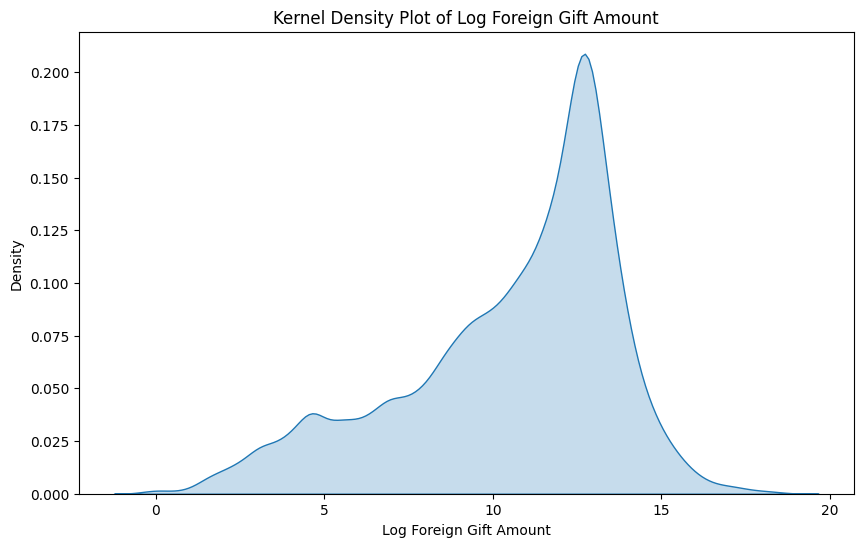

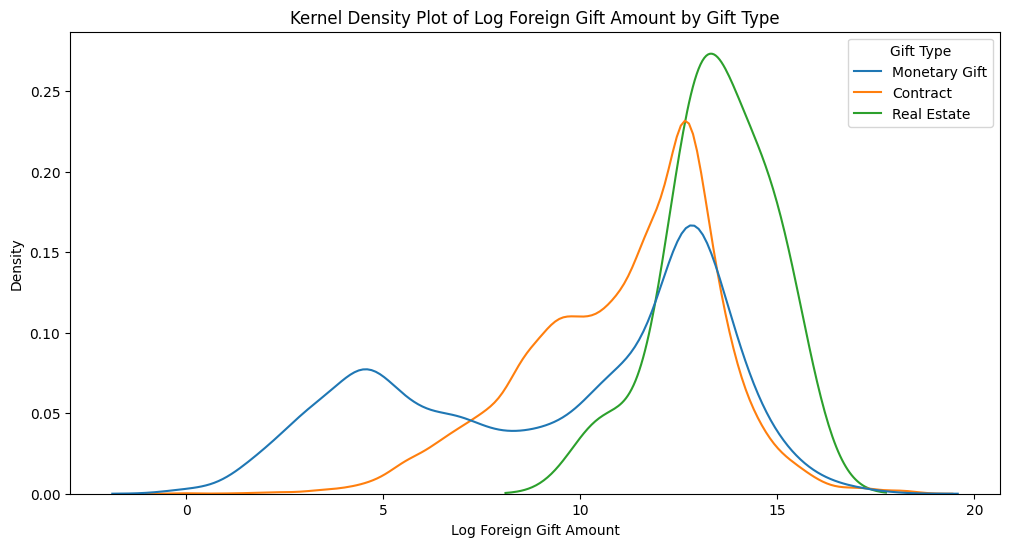

In [ ]:
import seaborn as sns
import numpy as np

df['Log Foreign Gift Amount'] = np.log(df['Foreign Gift Amount'])

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Log Foreign Gift Amount'], shade=True)
plt.title('Kernel Density Plot of Log Foreign Gift Amount')
plt.xlabel('Log Foreign Gift Amount')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Log Foreign Gift Amount', hue='Gift Type', common_norm=False)
plt.title('Kernel Density Plot of Log Foreign Gift Amount by Gift Type')
plt.xlabel('Log Foreign Gift Amount')
plt.ylabel('Density')
plt.show()


The trend I'm noticing is that there is a bias towards gift sizes around 10-15 thousand dollars. I would theorize that this is because gifts can be made from foreign entities at this amount without facing regulatory difficulties while making real impact.

5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

In [ ]:
print(df.columns)

top_countries_by_number = df.groupby('Country of Giftor')['Foreign Gift Amount'].count().sort_values(ascending=False).head(15)
print("Top 15 countries by number of gifts:")
print(top_countries_by_number)

top_countries_by_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("\nTop 15 countries by total gift amount:")
print(top_countries_by_amount)

Index(['ID', 'OPEID', 'Institution Name', 'City', 'State',
       'Foreign Gift Received Date', 'Foreign Gift Amount', 'Gift Type',
       'Country of Giftor', 'Giftor Name', 'Log Foreign Gift Amount'],
      dtype='object')
Top 15 countries by number of gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64

Top 15 countries by total gift amount:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN            

6. What are the top 15 institutions in terms of the total amount of money they receive?

In [ ]:
top_institutions_by_amount = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("\nTop 15 institutions by total gift amount:")
top_institutions_by_amount



Top 15 institutions by total gift amount:


,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


7. Make a histogram of the total amount received by all institutions.
Which giftors provide the most money, in total?

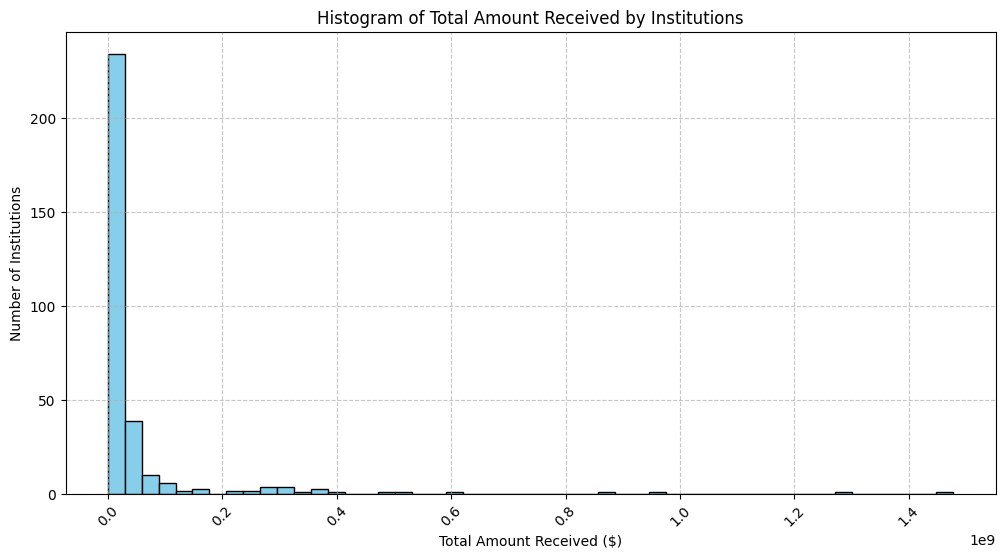


Top 10 Giftors by Total Gift Amount:


,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/deancuva/EDA/refs/heads/main/assignment/data/ForeignGifts_edu.csv')

df['Foreign Gift Amount'] = pd.to_numeric(df['Foreign Gift Amount'], errors='coerce')
df = df.dropna(subset=['Foreign Gift Amount'])

institution_totals = df.groupby('Institution Name')['Foreign Gift Amount'].sum()

plt.figure(figsize=(12, 6))
plt.hist(institution_totals, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Amount Received by Institutions')
plt.xlabel('Total Amount Received ($)')
plt.ylabel('Number of Institutions')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Giftors by Total Gift Amount:")
top_giftors


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_airbnb = pd.read_csv('https://raw.githubusercontent.com/deancuva/EDA/refs/heads/main/assignment/data/airbnb_hw.csv')

df_airbnb.head()




,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [10]:
print("Data Dimensions:", df_airbnb.shape)
print("Number of Observations:", df_airbnb.shape[0])
print("Variables:", df_airbnb.columns.tolist())
print(df_airbnb.head())

Data Dimensions: (30478, 13)
Number of Observations: 30478
Variables: ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment         

3. Cross-tabulation of Room Type and Property Type

In [11]:
room_property_crosstab = pd.crosstab(df_airbnb['Room Type'], df_airbnb['Property Type'])
room_property_crosstab


Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


4. For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again

<ipython-input-13-da40d72f8557>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_airbnb['Price'], shade=True)


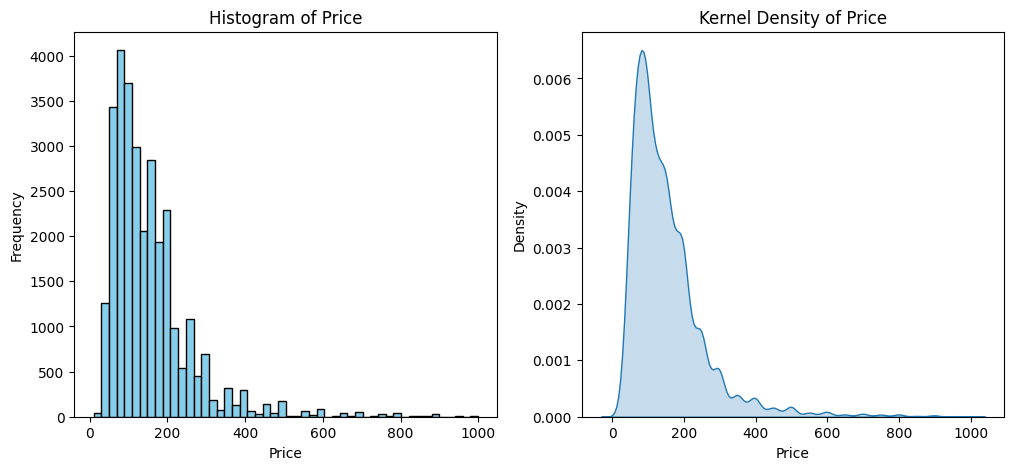

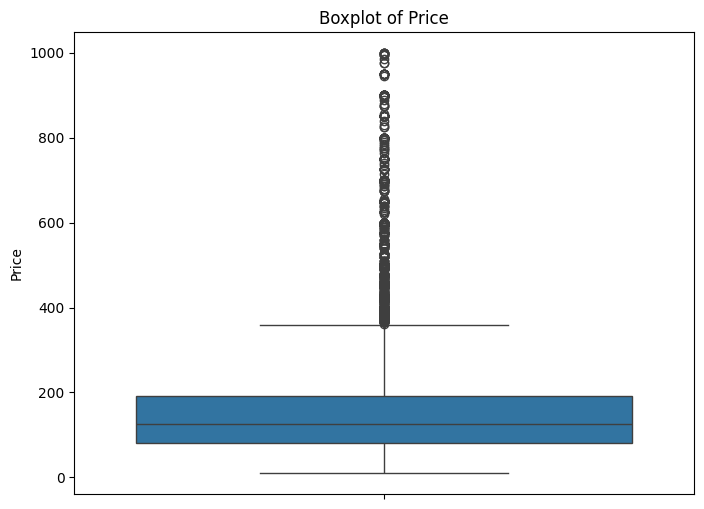

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


<ipython-input-13-da40d72f8557>:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_airbnb['price_log'], shade=True)


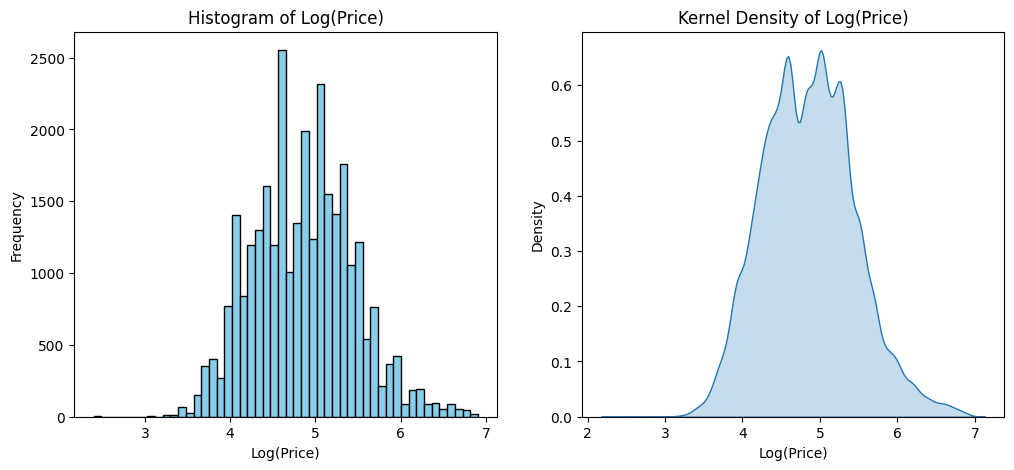

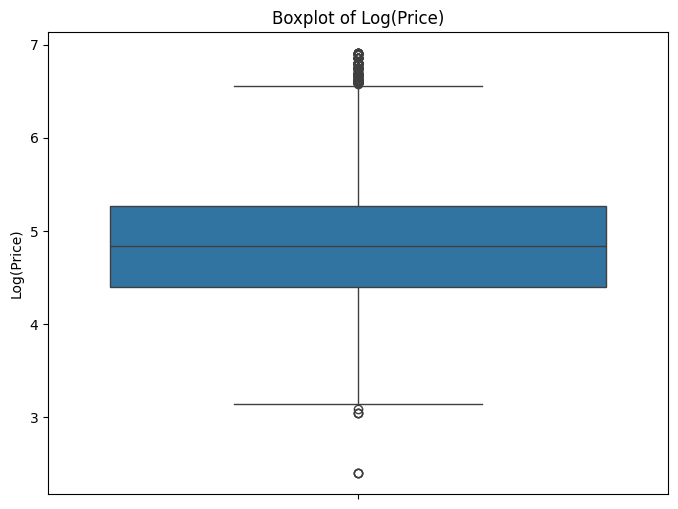

count    30297.000000
mean         4.854625
std          0.591928
min          2.397895
25%          4.394449
50%          4.836282
75%          5.262690
max          6.907755
Name: price_log, dtype: float64


In [13]:
df_airbnb['Price'] = pd.to_numeric(df_airbnb['Price'], errors='coerce')

df_airbnb = df_airbnb.dropna(subset=['Price'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df_airbnb['Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.kdeplot(df_airbnb['Price'], shade=True)
plt.title('Kernel Density of Price')
plt.xlabel('Price')

plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(y=df_airbnb['Price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()

print(df_airbnb['Price'].describe())


df_airbnb['price_log'] = np.log1p(df_airbnb['Price'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df_airbnb['price_log'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Log(Price)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.kdeplot(df_airbnb['price_log'], shade=True)
plt.title('Kernel Density of Log(Price)')
plt.xlabel('Log(Price)')
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(y=df_airbnb['price_log'])
plt.title('Boxplot of Log(Price)')
plt.ylabel('Log(Price)')
plt.show()

print(df_airbnb['price_log'].describe())


5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

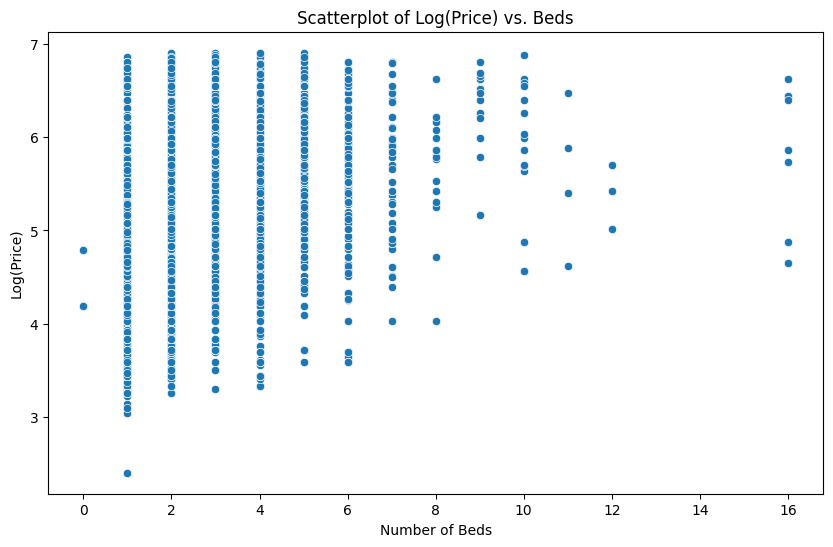

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20307.0,124.757670,75.685752,10.0,75.00,100.0,155.00,950.0
2.0,6561.0,186.702332,115.044205,25.0,115.00,160.0,225.00,999.0
3.0,2029.0,234.928043,142.288189,26.0,140.00,200.0,299.00,999.0
4.0,766.0,280.554830,175.512312,27.0,150.00,240.0,363.75,999.0
5.0,274.0,322.000000,190.319415,35.0,186.00,285.0,425.00,995.0
6.0,166.0,316.313253,201.157585,35.0,183.75,271.0,399.00,900.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,20.0,331.850000,155.652202,55.0,218.75,339.5,408.75,750.0


In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Beds', y='price_log', data=df_airbnb)
plt.title('Scatterplot of Log(Price) vs. Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.show()

price_by_beds = df_airbnb.groupby('Beds')['Price'].describe()
price_by_beds




The standard deviation seems to become a lot more narrow as the number of bedrooms increase.

6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

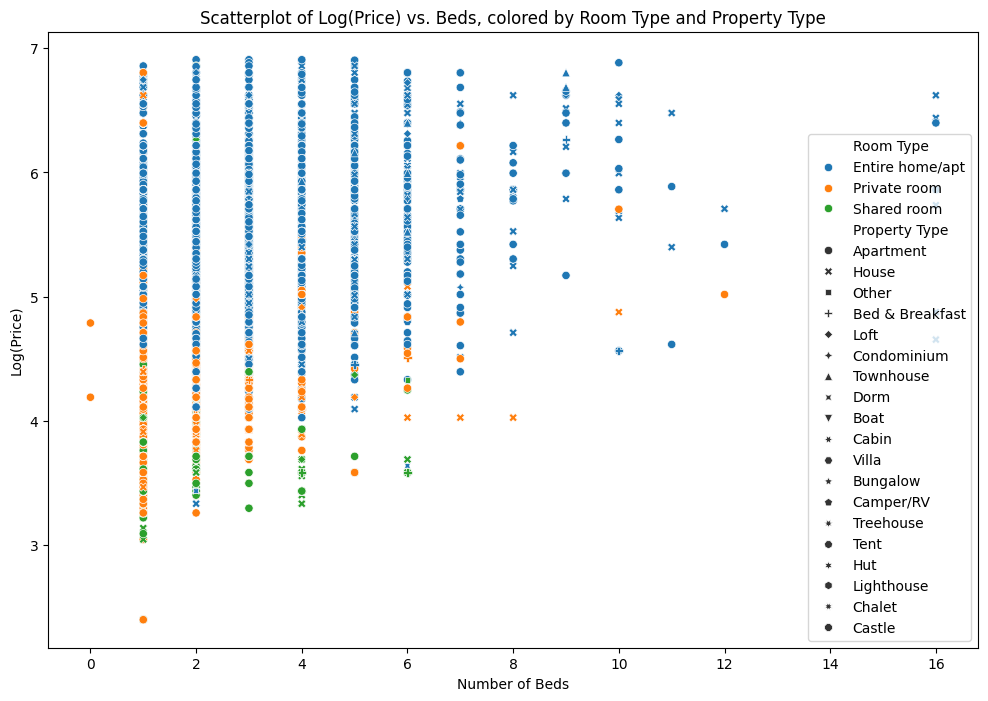

                                   count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other    

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Beds', y='price_log', hue='Room Type', style='Property Type', data=df_airbnb)
plt.title('Scatterplot of Log(Price) vs. Beds, colored by Room Type and Property Type')
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.show()

price_description = df_airbnb.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(price_description)

highest_avg_price = price_description['mean'].idxmax()
print(f"\nRoom Type and Property Type with the highest average price: {highest_avg_price}")

highest_std_price = price_description['std'].idxmax()
print(f"\nRoom Type and Property Type with the highest standard deviation in price: {highest_std_price}")

print("\nComparison of Mean and Median:")
print("Since the distribution of prices is likely skewed due to outliers, the median is probably a more reliable estimate of central tendency.")
print("The mean is sensitive to extreme values, while the median represents the middle value, and thus less affected by outliers.")


7. We've looked a bit at this price_log and Beds scatterplot. Use seaborn to make a jointplot with kind=hex. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

<Figure size 1000x800 with 0 Axes>

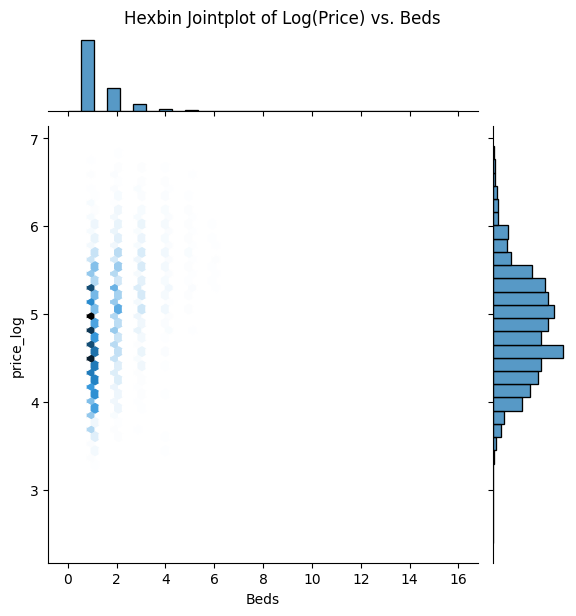

The hexbin plot reveals the density of data points across different combinations of 'Beds' and 'price_log'.  Areas with darker hexagons indicate a higher concentration of data points, suggesting more frequent occurrences of those particular price-bed combinations. This visualization helps to identify clusters of data and areas where the data are sparse. This may lead us to reconsider the simple scatter plots, and to instead consider those clusters when looking for patterns in price and bed combinations.


In [17]:
plt.figure(figsize=(10, 8))
sns.jointplot(x='Beds', y='price_log', data=df_airbnb, kind='hex', marginal_kws=dict(bins=30))
plt.suptitle('Hexbin Jointplot of Log(Price) vs. Beds', y=1.02)
plt.show()

print("The hexbin plot reveals the density of data points across different combinations of 'Beds' and 'price_log'.  Areas with darker hexagons indicate a higher concentration of data points, suggesting more frequent occurrences of those particular price-bed combinations. This visualization helps to identify clusters of data and areas where the data are sparse. This may lead us to reconsider the simple scatter plots, and to instead consider those clusters when looking for patterns in price and bed combinations.")
